In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Load the dataset
df = pd.read_csv("cardfraud.csv")

In [9]:
# Select the relevant columns for analysis
columns = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price",
           "repeat_retailer", "used_chip", "used_pin_number", "online_order"]
X = df[columns]
y = df["fraud"]


In [10]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Specify the desired number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test_pca)

In [14]:

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[181788    769]
 [ 16863    580]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95    182557
         1.0       0.43      0.03      0.06     17443

    accuracy                           0.91    200000
   macro avg       0.67      0.51      0.51    200000
weighted avg       0.87      0.91      0.88    200000



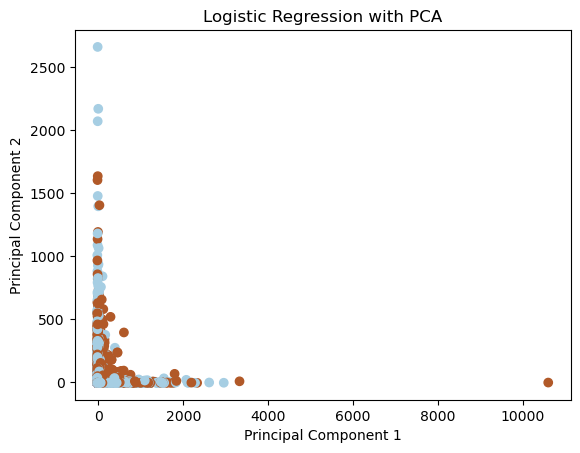

In [16]:
# Plot the data and decision boundary
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression with PCA')
plt.show()